## Sentences vectorisation
Text of memes are vectorised using pretrained Universal sentence encoding <cite data-cite="cer2018">(Cer et al., 2018)</cite>. The dataset of training is not specified nor open sourced by the authors. 

In [ ]:
from sklearn.manifold import TSNE
from umap import UMAP
from matplotlib import pyplot as plt
import seaborn as sns
from src.utils.files import load_cat_df, load_dfs
from src.utils.embeddings import load_img_embeddings, load_sent_embeddings

In [2]:
# silence NumbaPerformanceWarning
import warnings
from numba.errors import NumbaPerformanceWarning

warnings.filterwarnings("ignore", category=NumbaPerformanceWarning)

## Visualisation of labels distribution

In [3]:
df_train, df_dev = load_dfs(["data/train_cleaned_final.csv", "data/dev_cleaned_final.csv"])

### Image

In [4]:
img_embed = load_img_embeddings("data/features/xception.pkl.train")

In [5]:
img_embed_dev = load_img_embeddings("data/features/xception.pkl.dev")

In [41]:
tsne = TSNE(n_components=2, init='pca', random_state=0)
img_tsne = tsne.fit_transform(img_embed)

In [42]:
img_tsne.shape

(6999, 2)

In [43]:
umap = UMAP()
img_umap = umap.fit_transform(img_embed)

In [44]:
df_train["tsne_img_x"] = img_tsne[:,0]
df_train["tsne_img_y"] = img_tsne[:,1]
df_train["umap_img_x"] = img_umap[:,0]
df_train["umap_img_y"] = img_umap[:,1]

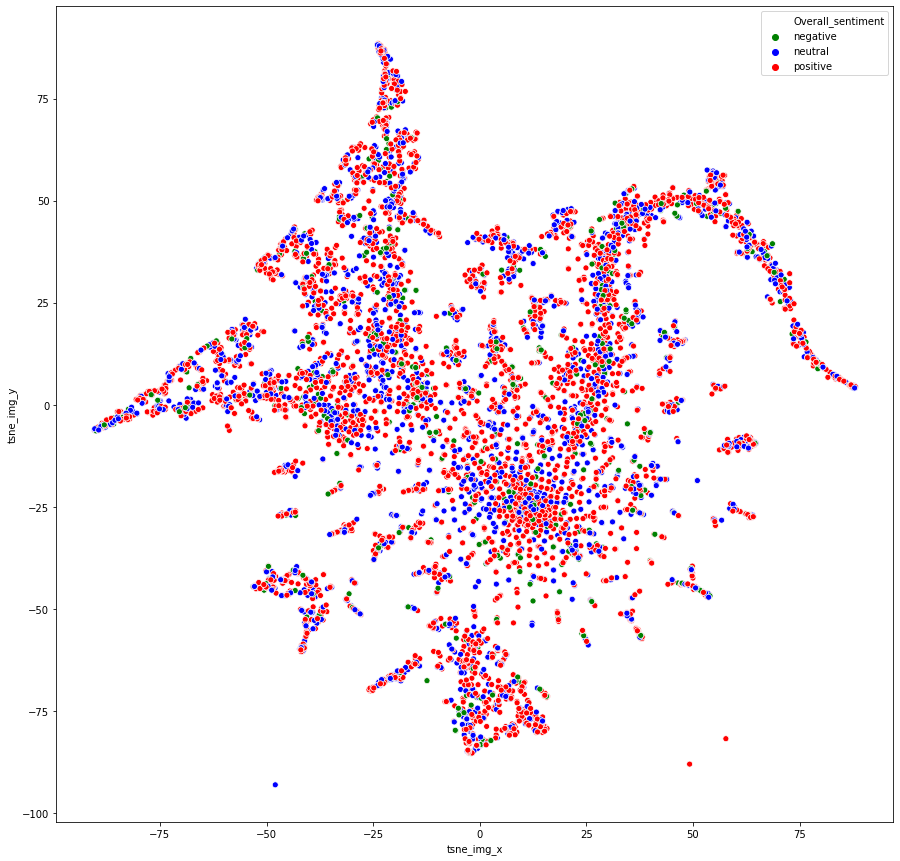

In [45]:
plt.figure(figsize=(15,15))
sns.scatterplot(
    x="tsne_img_x", y="tsne_img_y",
    hue="Overall_sentiment",
    palette=["green", "blue", "red"],
    data=df_train,
    legend="full"
)

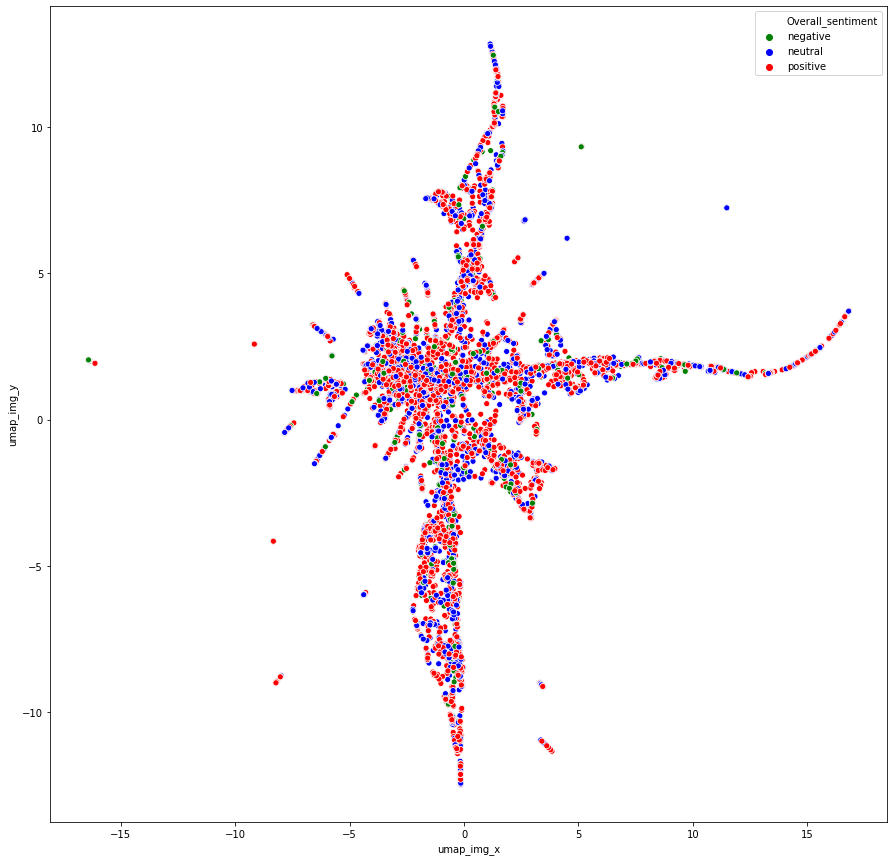

In [12]:
plt.figure(figsize=(15,15))
sns.scatterplot(
    x="umap_img_x", y="umap_img_y",
    hue="Overall_sentiment",
    palette=["green", "blue", "red"],
    data=df_train,
    legend="full"
)

In [13]:
df_train["Sarcasm"].unique()

[general, not_sarcastic, twisted_meaning, very_twisted]
Categories (4, object): [not_sarcastic < general < twisted_meaning < very_twisted]

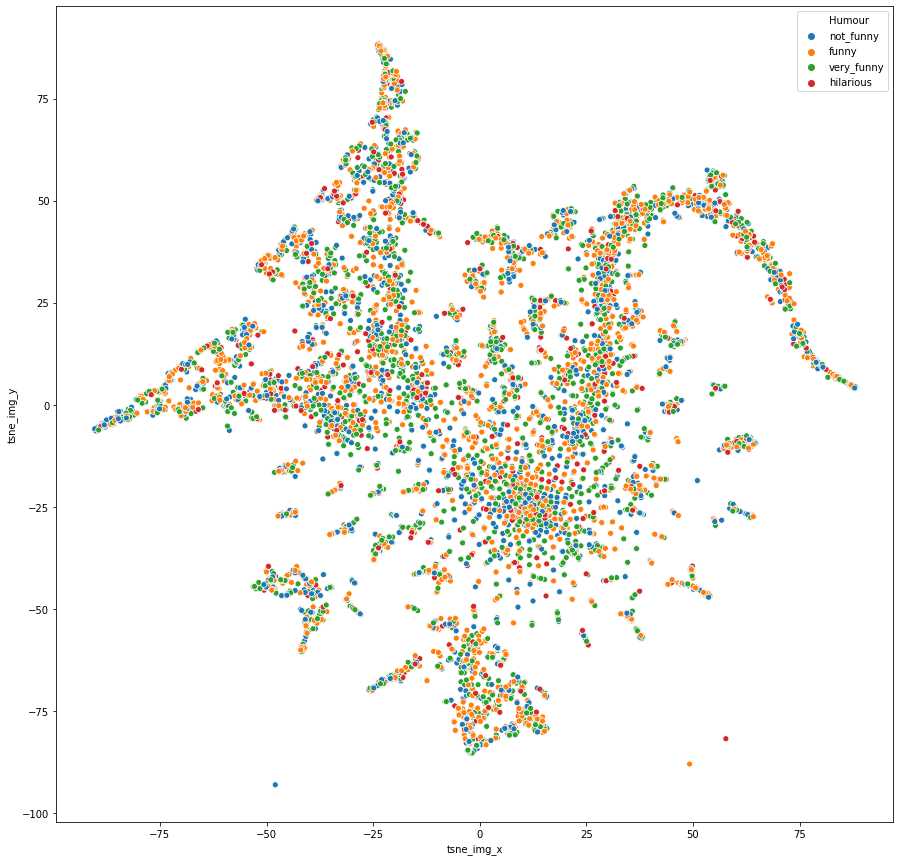

In [14]:
plt.figure(figsize=(15,15))
sns.scatterplot(
    x="tsne_img_x", y="tsne_img_y",
    hue="Humour",
    data=df_train,
    legend="full",
    hue_order=["not_funny", "funny", "very_funny", "hilarious"]
)

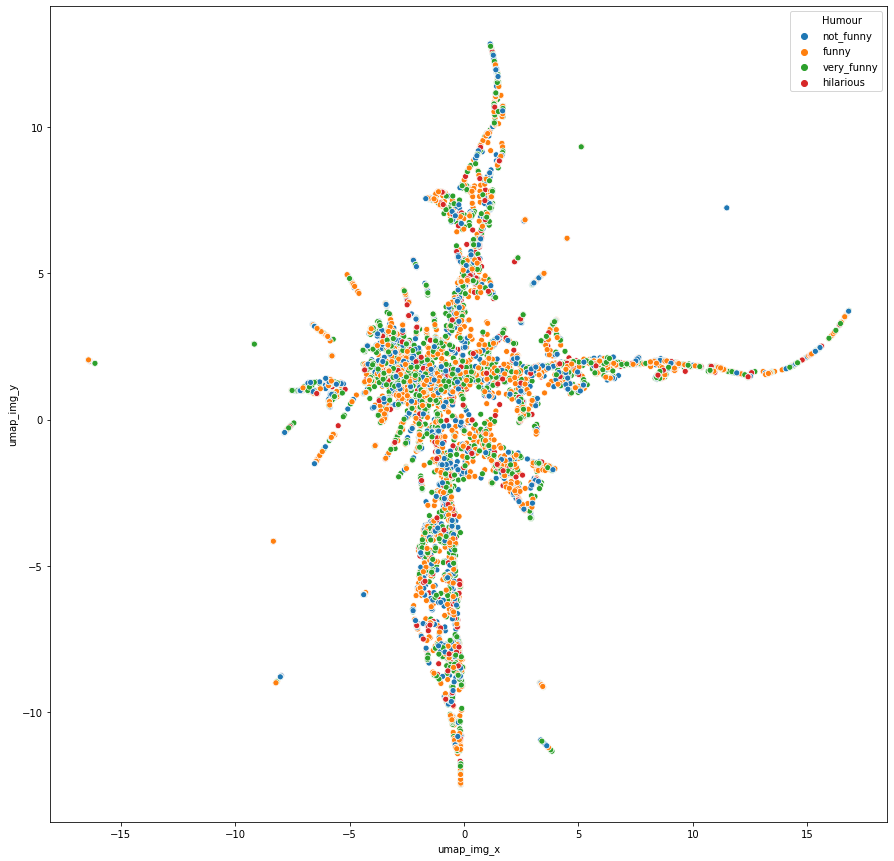

In [15]:
plt.figure(figsize=(15,15))
sns.scatterplot(
    x="umap_img_x", y="umap_img_y",
    hue="Humour",
    data=df_train,
    legend="full",
    hue_order=["not_funny", "funny", "very_funny", "hilarious"]
)

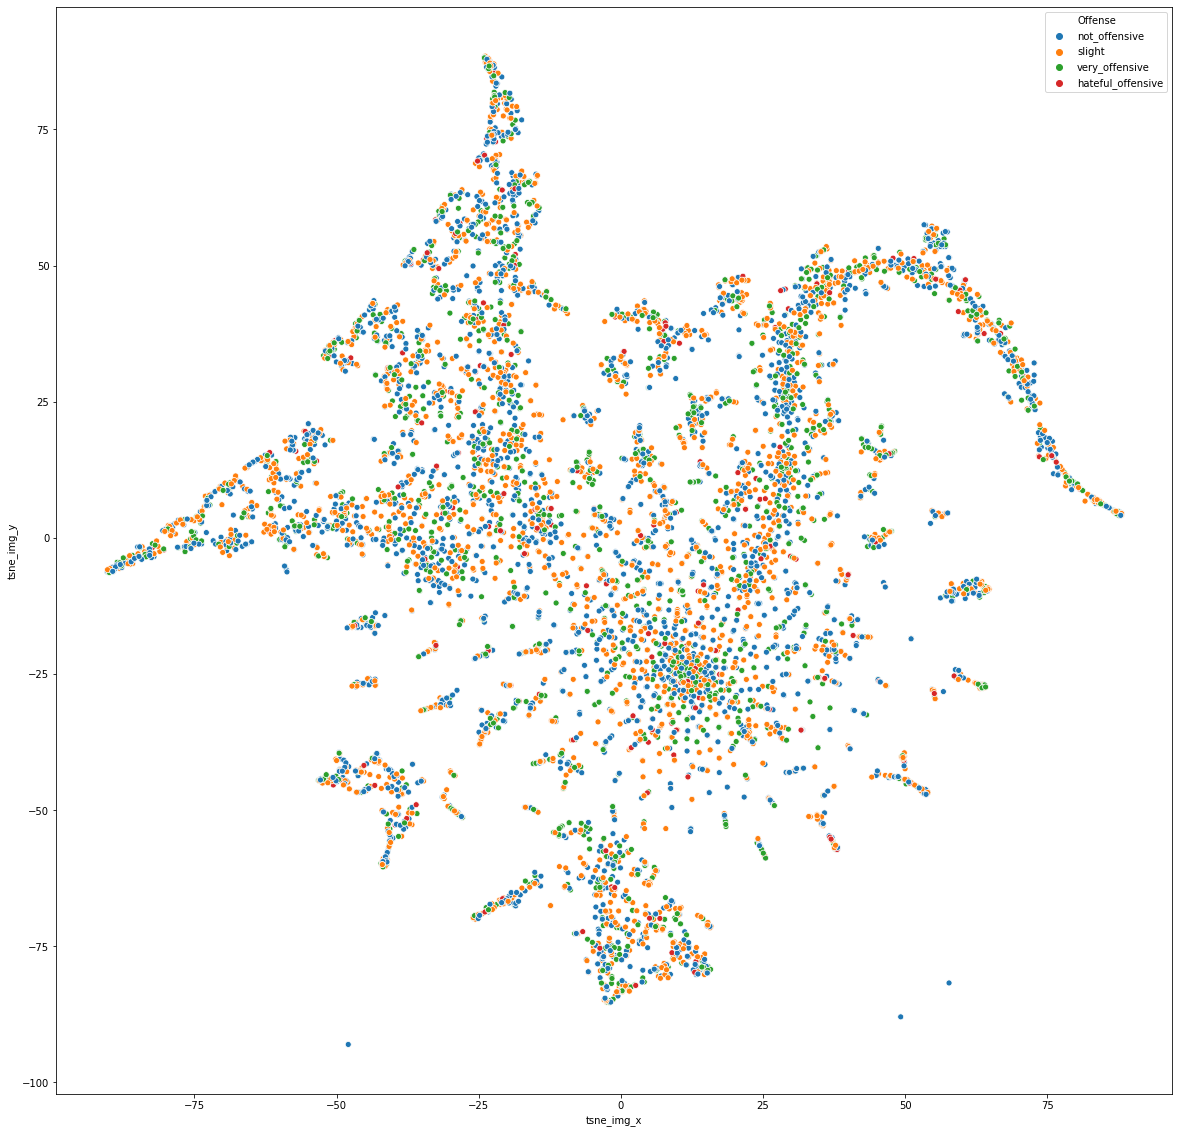

In [16]:
plt.figure(figsize=(20,20))
sns.scatterplot(
    x="tsne_img_x", y="tsne_img_y",
    hue="Offense",
    data=df_train,
    legend="full",
    hue_order=["not_offensive", "slight", "very_offensive", "hateful_offensive"]
)

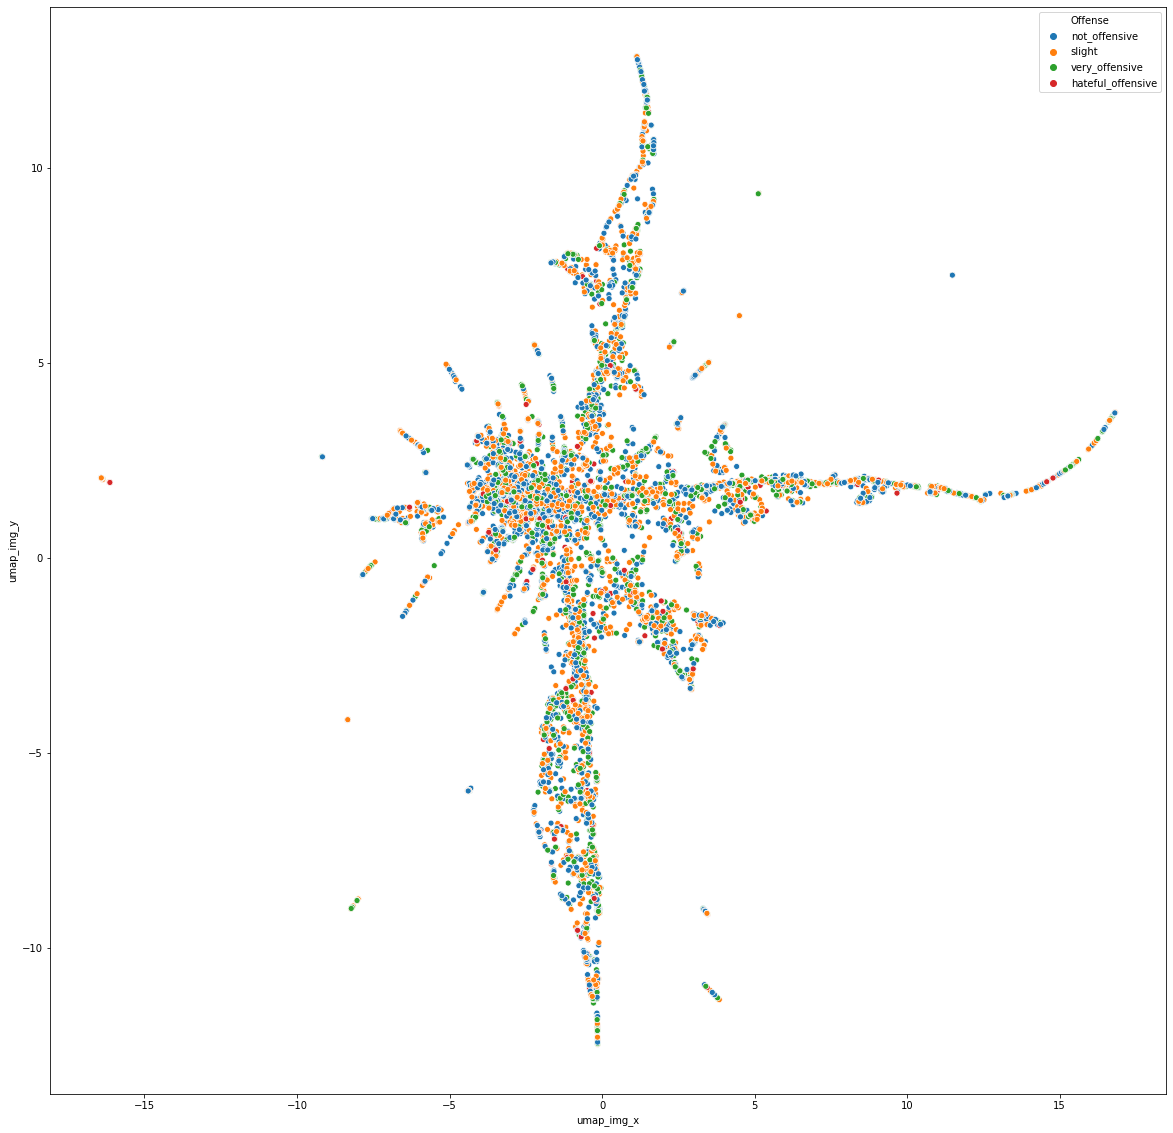

In [17]:
plt.figure(figsize=(20,20))
sns.scatterplot(
    x="umap_img_x", y="umap_img_y",
    hue="Offense",
    data=df_train,
    legend="full",
    hue_order=["not_offensive", "slight", "very_offensive", "hateful_offensive"]
)

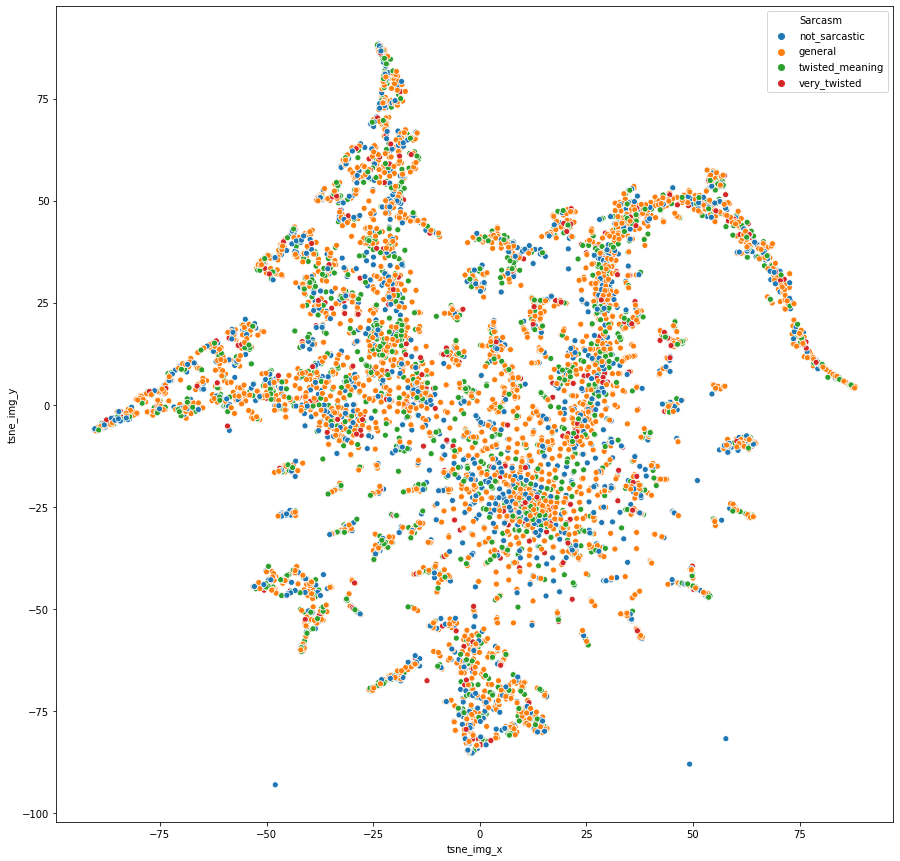

In [18]:
plt.figure(figsize=(15,15))
sns.scatterplot(
    x="tsne_img_x", y="tsne_img_y",
    hue="Sarcasm",
    data=df_train,
    legend="full",
    hue_order=["not_sarcastic", "general",  "twisted_meaning", "very_twisted"]
)

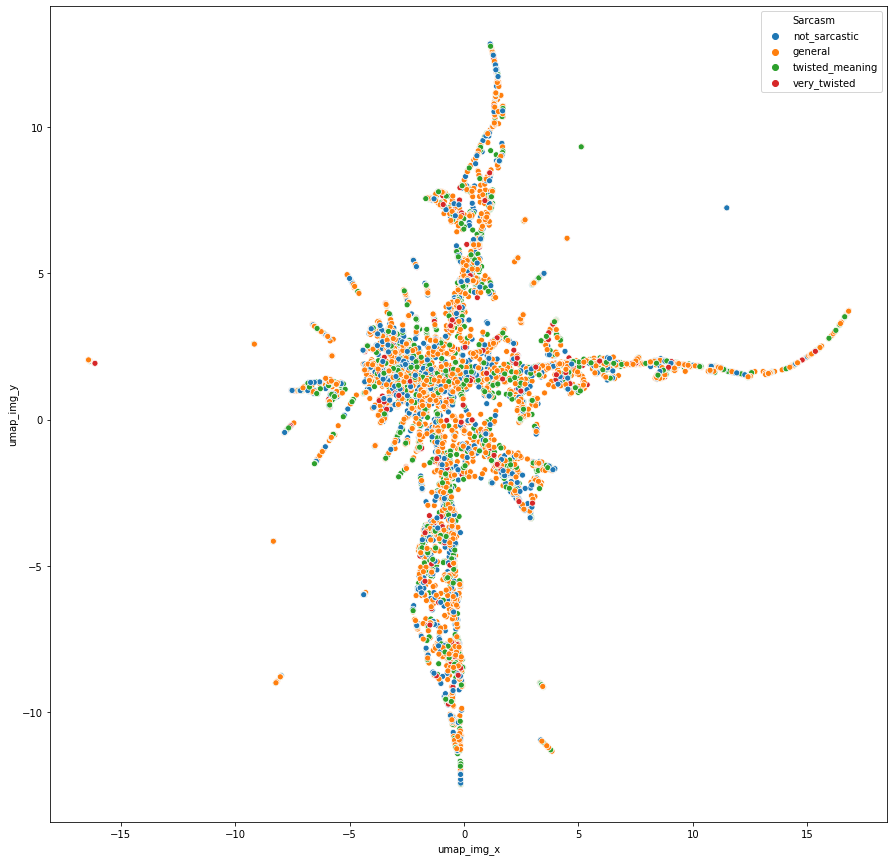

In [19]:
plt.figure(figsize=(15,15))
sns.scatterplot(
    x="umap_img_x", y="umap_img_y",
    hue="Sarcasm",
    data=df_train,
    legend="full",
    hue_order=["not_sarcastic", "general",  "twisted_meaning", "very_twisted"]
)

### Text

In [20]:
sent_embed = load_sent_embeddings("data/features/use.pkl.train")

In [21]:
sent_embed_dev = load_sent_embeddings("data/features/use.pkl.dev")

In [22]:
sent_embed.shape

(6999, 512)

In [23]:
sent_embed_dev.shape

(1000, 512)

In [24]:
tsne = TSNE(n_components=2, init='pca', random_state=0)
sent_tsne = tsne.fit_transform(sent_embed)

In [25]:
umap = UMAP()
sent_umap = umap.fit_transform(sent_embed)

In [26]:
df_train["tsne_sent_x"] = sent_tsne[:,0]
df_train["tsne_sent_y"] = sent_tsne[:,1]
df_train["umap_sent_x"] = sent_umap[:,0]
df_train["umap_sent_y"] = sent_umap[:,1]

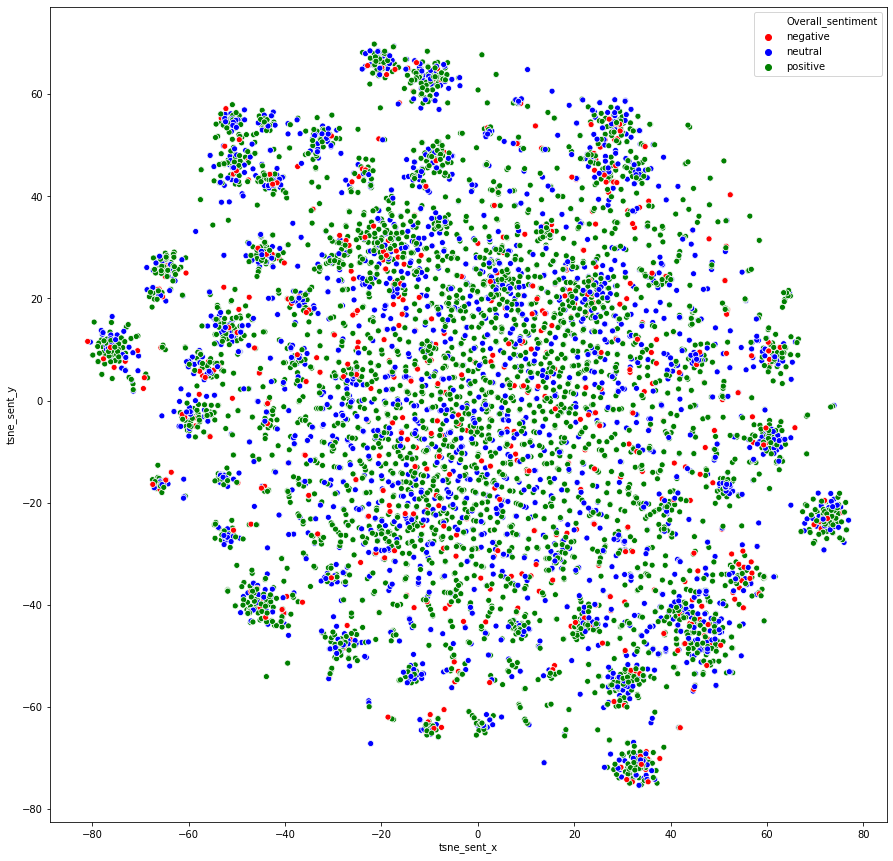

In [27]:
plt.figure(figsize=(15,15))
sns.scatterplot(
    x="tsne_sent_x", y="tsne_sent_y",
    hue="Overall_sentiment",
    palette=["red", "blue", "green"],
    data=df_train,
    legend="full"
)

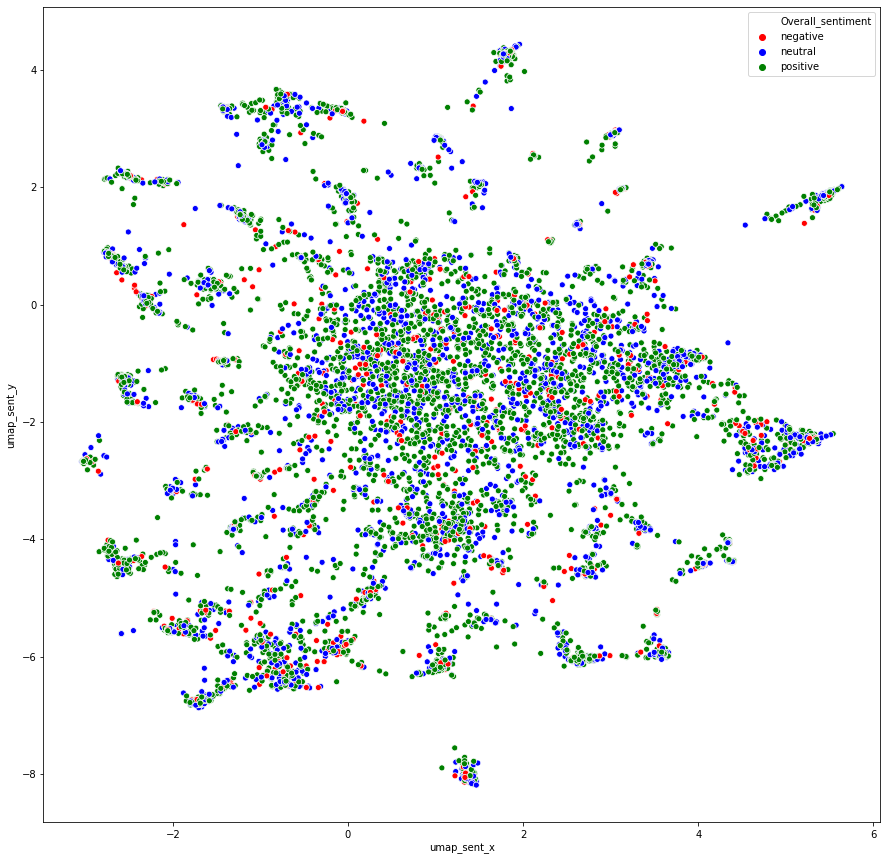

In [28]:
plt.figure(figsize=(15,15))
sns.scatterplot(
    x="umap_sent_x", y="umap_sent_y",
    hue="Overall_sentiment",
    palette=["red", "blue", "green"],
    data=df_train,
    legend="full"
)

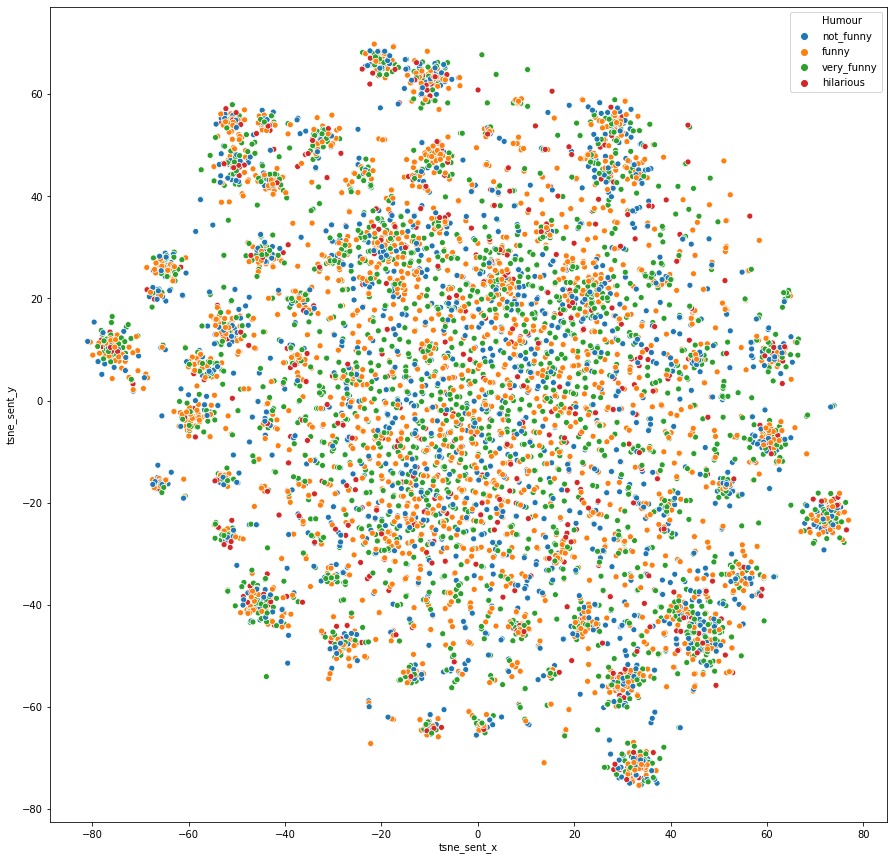

In [29]:
plt.figure(figsize=(15,15))
sns.scatterplot(
    x="tsne_sent_x", y="tsne_sent_y",
    hue="Humour",
    data=df_train,
    legend="full",
    hue_order=["not_funny", "funny", "very_funny", "hilarious"]
)

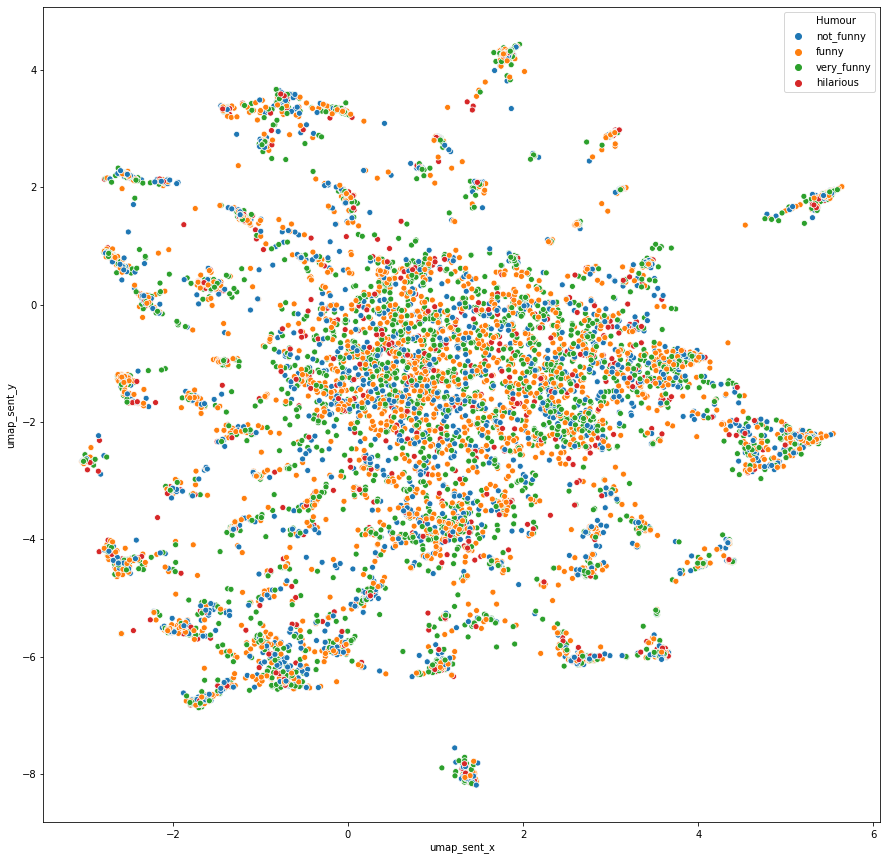

In [30]:
plt.figure(figsize=(15,15))
sns.scatterplot(
    x="umap_sent_x", y="umap_sent_y",
    hue="Humour",
    data=df_train,
    legend="full",
    hue_order=["not_funny", "funny", "very_funny", "hilarious"]
)

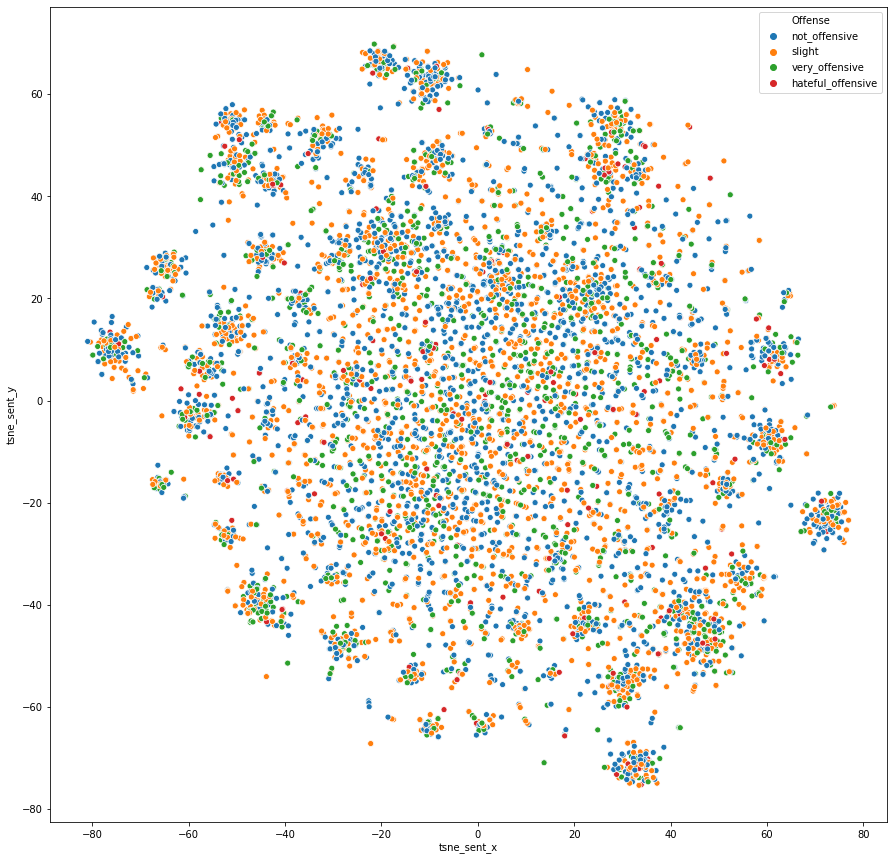

In [31]:
plt.figure(figsize=(15,15))
sns.scatterplot(
    x="tsne_sent_x", y="tsne_sent_y",
    hue="Offense",
    data=df_train,
    legend="full",
    hue_order=["not_offensive", "slight", "very_offensive", "hateful_offensive"]
)

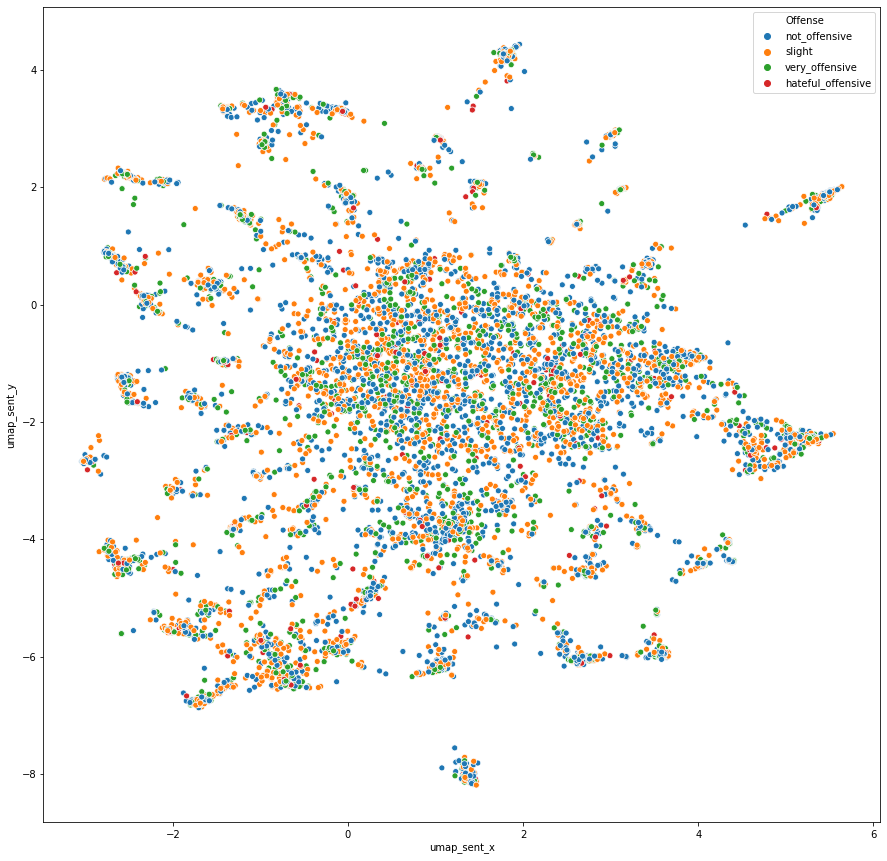

In [32]:
plt.figure(figsize=(15,15))
sns.scatterplot(
    x="umap_sent_x", y="umap_sent_y",
    hue="Offense",
    data=df_train,
    legend="full",
    hue_order=["not_offensive", "slight", "very_offensive", "hateful_offensive"]
)

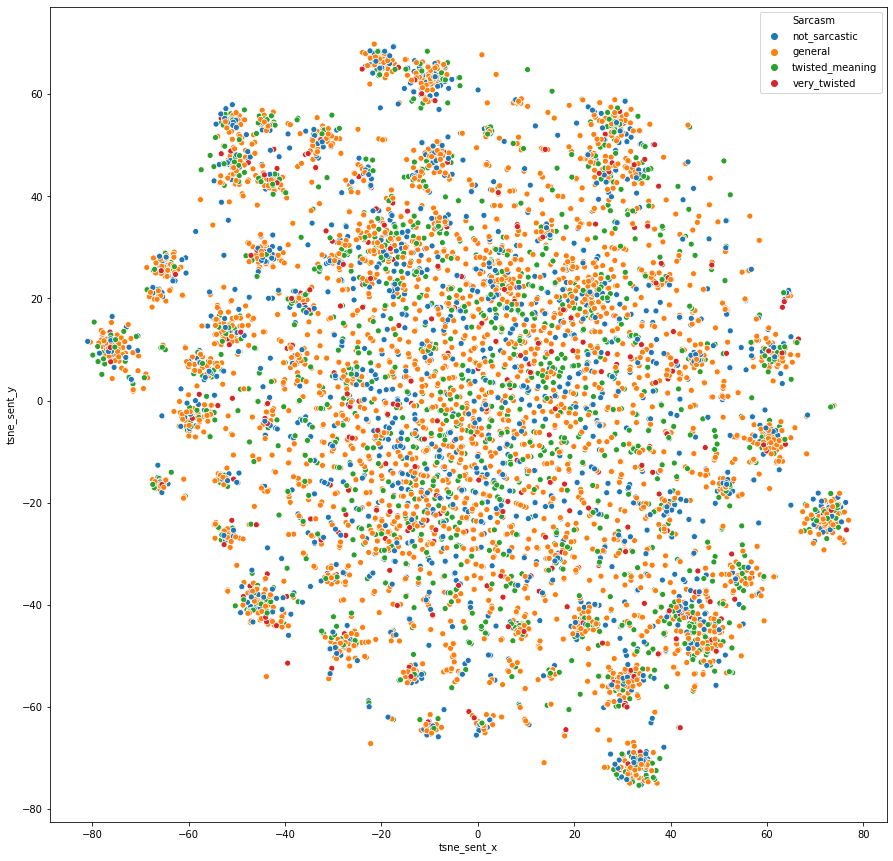

In [33]:
plt.figure(figsize=(15,15))
sns.scatterplot(
    x="tsne_sent_x", y="tsne_sent_y",
    hue="Sarcasm",
    data=df_train,
    legend="full",
    hue_order=["not_sarcastic", "general",  "twisted_meaning", "very_twisted"]
)


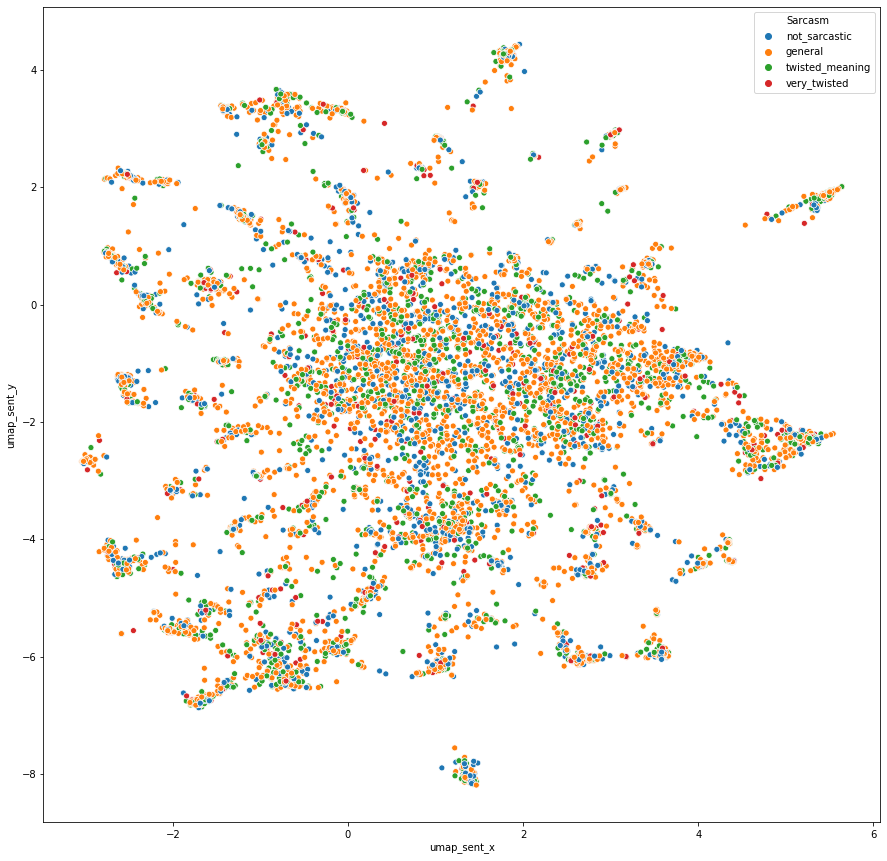

In [34]:
plt.figure(figsize=(15,15))
sns.scatterplot(
    x="umap_sent_x", y="umap_sent_y",
    hue="Sarcasm",
    data=df_train,
    legend="full",
    hue_order=["not_sarcastic", "general",  "twisted_meaning", "very_twisted"]
)
